<a href="https://colab.research.google.com/github/gabrielfernandorey/gabrielfernandorey.github.io/blob/main/projects/ML01/flight_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Delay
##### Machine Learning
##### Desarrollado por Gabriel Rey



El problema consiste en predecir la probabilidad de atraso de los vuelos que despegaron del aeropuerto de Santiago de Chile (SCL) con datos públicos y reales del año 2017. Para cada vuelo se cuenta con la siguiente información:

- Fecha-I : Fecha y hora programada del vuelo.
- Vlo-I : Número de vuelo programado.
- Ori-I : Código de ciudad de origen programado.
- Des-I : Código de ciudad de destino programado.
- Emp-I : Código aerolínea de vuelo programado.
- Fecha-O : Fecha y hora de operación del vuelo.
- Vlo-O : Número de vuelo de operación del vuelo.
- Ori-O : Código de ciudad de origen de operación
- Des-O : Código de ciudad de destino de operación.
- Emp-O : Código aerolínea de vuelo operado.
- DIA : Día del mes de operación del vuelo.
- MES : Número de mes de operación del vuelo.
- AÑO : Año de operación del vuelo.
- DIANOM : Día de la semana de operación del vuelo.
- TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
- OPERA : Nombre de aerolínea que opera.
- SIGLAORI : Nombre ciudad origen.
- SIGLADES : Nombre ciudad destino.



Información complementaria:
- temporada_alta : entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep
- atraso: se considera atraso si la diferencia entre la las variables Fecha-O y Fecha-I es mayor a 15 minutos
- periodo_dia : se considera categorizar en { mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59) }, en base a
la variable Fecha-I

---
### Indice
  - ##### Entendiendo el problema
  - ##### EDA
  - ##### Modelos
---



## Primera vista de los datos



In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
# Cargando los datos
filename = 'https://raw.githubusercontent.com/gabrielfernandorey/gabrielfernandorey.github.io/main/projects/ML01/dataset_SCL.csv'
df_raw = pd.read_csv(filename)
df_raw.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## EDA

In [3]:
# Tipo de datos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [4]:
# Valores nulos
df_raw.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Se detecta un valor nulo y se procede a su tratamiento

In [5]:
# Registro con valor nulo en Vlo-O
df_raw[df_raw['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Para tratar el valor nulo primero se procede a validar la relacion entre la variable Vlo-I (Número de vuelo programado) y Vlo-O (Número de vuelo de operación del vuelo), se valida la similitud.

In [6]:
# Validar si hay diferencias de valores entre Vlo-I y Vlo-O
diferencias = df_raw[df_raw['Vlo-I'] != df_raw['Vlo-O']]
diferencias.count()

Fecha-I      1850
Vlo-I        1850
Ori-I        1850
Des-I        1850
Emp-I        1850
Fecha-O      1850
Vlo-O        1849
Ori-O        1850
Des-O        1850
Emp-O        1850
DIA          1850
MES          1850
AÑO          1850
DIANOM       1850
TIPOVUELO    1850
OPERA        1850
SIGLAORI     1850
SIGLADES     1850
dtype: int64

Existen 1850 filas que difieren en valor entre las columnas estudiadas. Esto representa casi un 3% del total de los datos por lo tanto estos registros no serán descartados.


Con respecto al valor nulo detectado, se resolverá mediante la imputacion del mismo valor que tiene Vlo-I, ya que el 97% de los casos del dataset existe similitud de valores entre estas variables y por ser un único valor a imputar no impactará en la validez de los datos.

In [7]:
df_raw.at[6068,'Vlo-O'] = '200'
df_raw.loc[6068]

Fecha-I       2017-01-19 11:00:00
Vlo-I                         200
Ori-I                        SCEL
Des-I                        SPJC
Emp-I                         LAW
Fecha-O       2017-01-19 11:03:00
Vlo-O                         200
Ori-O                        SCEL
Des-O                        SPJC
Emp-O                         56R
DIA                            19
MES                             1
AÑO                          2017
DIANOM                     Jueves
TIPOVUELO                       I
OPERA        Latin American Wings
SIGLAORI                 Santiago
SIGLADES                     Lima
Name: 6068, dtype: object

In [8]:
# Buscamos si hay diferencias entre las variables Ori-I y Ori-O
diferencias = df_raw[df_raw['Ori-I'] != df_raw['Ori-O']]
diferencias.count()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Podemos prescindir de la columna Ori-O ya que no presenta diferencias entre ambas columnas

In [9]:
df_raw = df_raw.drop("Ori-O", axis=1)

In [10]:
# Buscamos otras diferencias entre las variables Desi-I y Des-O
diferencias = df_raw[df_raw['Des-I'] != df_raw['Des-O']]
diferencias.count()

Fecha-I      28
Vlo-I        28
Ori-I        28
Des-I        28
Emp-I        28
Fecha-O      28
Vlo-O        28
Des-O        28
Emp-O        28
DIA          28
MES          28
AÑO          28
DIANOM       28
TIPOVUELO    28
OPERA        28
SIGLAORI     28
SIGLADES     28
dtype: int64

Encontramos diferencias y preservamos ambas columnas

In [11]:
# Buscamos otras diferencias entre Emp-I y Emp-O
diferencias = df_raw[df_raw['Emp-I'] != df_raw['Emp-O']]
diferencias.count()

Fecha-I      18669
Vlo-I        18669
Ori-I        18669
Des-I        18669
Emp-I        18669
Fecha-O      18669
Vlo-O        18669
Des-O        18669
Emp-O        18669
DIA          18669
MES          18669
AÑO          18669
DIANOM       18669
TIPOVUELO    18669
OPERA        18669
SIGLAORI     18669
SIGLADES     18669
dtype: int64

Encontramos 18669 registros en donde difieren Emp-I y Emp-O, preservamos ambas columnas

In [12]:
# Año/s de ocurrencia de los vuelos
df_raw.AÑO.value_counts()


2017    68204
2018        2
Name: AÑO, dtype: int64

In [13]:
print('Fecha mínima dataset:', min(df_raw['Fecha-I']))
print('Fecha máxima dataset:', max(df_raw['Fecha-I']))

Fecha mínima dataset: 2017-01-01 00:15:00
Fecha máxima dataset: 2017-12-31 23:55:00


Los datos son desde enero a diciembre de 2017, la columna AÑO por excepcion presenta 2 casos donde el año es 2018 correspondiente al 31-12-2017.

In [14]:
# Validar si ORI-I contiene solo el valor SCEL (Santiago de Chile)
df_raw[(df_raw['Ori-I'] == 'SCEL')]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


Validamos que la variable Ori-I tiene todos los valores en 'SCEL', por lo tanto todos los registros corresponden a despegues de SCEL (No hay arribos a Santiago de Chile)

### Agregado de nuevas columnas
Agregamos columnas adicionales en función de la información complementaria y luego exportamos a un archivo synthetic_features.csv

In [15]:
# Agregamos columnas nuevas en un nuevo df
df_transform = df_raw.copy()

In [16]:
df_transform['temporada_alta'] = 0
df_transform['dif_min'] = None
df_transform['atraso_15'] = 0
df_transform['periodo_dia'] = None

In [17]:
# temporada alta = 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
def check_condition(date):
    if pd.to_datetime('2016-12-15') <= pd.to_datetime(date) <= pd.to_datetime('2017-03-03') or \
        pd.to_datetime('2016-12-15') <= pd.to_datetime(date) <= pd.to_datetime('2017-03-03') or \
        pd.to_datetime('2016-12-15') <= pd.to_datetime(date) <= pd.to_datetime('2017-03-03'):
        return 1
    else:
        return 0

df_transform['temporada_alta'] = df_transform['Fecha-I'].apply(check_condition)


In [18]:
# diferencia en minutos entre Fecha-O y Fecha-I
def check_condition(row):
    if pd.to_datetime(row['Fecha-O']) >= pd.to_datetime(row['Fecha-I']):
      diferencia = (pd.to_datetime(row['Fecha-O']) - pd.to_datetime(row['Fecha-I'])).total_seconds() / 60
    else:
      diferencia = pd.to_datetime(0).minute
    return diferencia

df_transform['dif_min'] = df_transform.apply(check_condition, axis=1)


In [19]:
# 1 si dif_min > 15, 0 si no
def check_condition(dif_min):
    if dif_min > 15:
        return 1
    else:
        return 0

df_transform['atraso_15'] = df_transform['dif_min'].apply(check_condition)

In [20]:
# mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I
def check_condition(hms):
  if pd.to_datetime('05:00').time() <= pd.to_datetime(hms).time() <= pd.to_datetime('11:59').time():
    return 'mañana'
  elif pd.to_datetime('12:00').time() <= pd.to_datetime(hms).time() <= pd.to_datetime('18:59').time():
    return 'tarde'
  else:
    return 'noche'

df_transform['periodo_dia'] = df_transform['Fecha-I'].apply(check_condition)

In [21]:
df_transform

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,0.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,0,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,0,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,0,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,0,13.0,0,tarde


In [22]:
# Exportacion
compression_opts = dict(method='zip', archive_name='out.csv')
df_raw.to_csv('export.zip', index=False, compression=compression_opts)

### ¿Como se compone la distribucion entre vuelos atrasados y no atrasados?

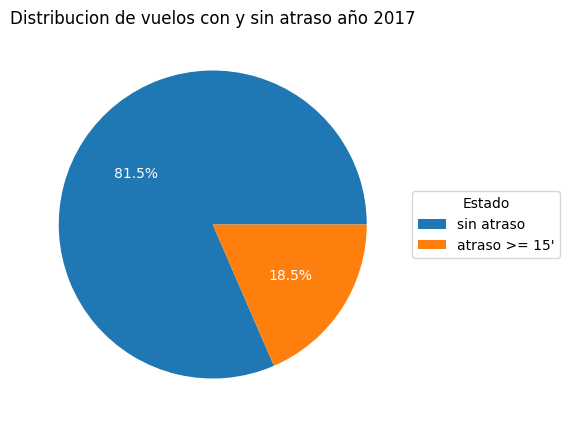

In [23]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"

data = df_transform['atraso_15'].value_counts()
fig, ax=plt.subplots(figsize=(5,5))
w, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
ax.set_title('Distribucion de vuelos con y sin atraso año 2017')
ax.legend(w, ["sin atraso", "atraso >= 15'"], title="Estado", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_ylabel('');

### ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

#### Analisis en funcion del "tiempo de atraso"
La tasa de atraso se ha calculado en función tiempo promedio en minutos de atraso para cada variable estudiada.

In [24]:
# Definir umbral y color
def grafico_tasa(tasa, titulo):
  umbral = 15
  color_umbral = 'red'

  fig, ax1 = plt.subplots(figsize=(30,5))
  ax2 = ax1.twinx()  # Crear ejes independientes para el segundo gráfico
  ax1.bar(tasa.index, tasa.dif_min.values, color=[color_umbral if valor >= umbral else 'darkgreen' for valor in tasa.dif_min.to_list()])
  ax1.set_ylabel("Promedio de atraso (Minutos)")
  ax1.set_title(f"Tasa de atraso por {titulo} - (en rojo: atraso > 15 minutos | amarillo: cant. de vuelos)")
  ax1.set_xticks( tasa.index )
  ax1.set_xticklabels(tasa.index, rotation=85, ha='center')

  ax2.scatter(tasa.index, tasa.iloc[:,1].values, color='orange')
  ax2.set_ylabel("Cantidad de Vuelos")

  plt.show;

##### Por destino

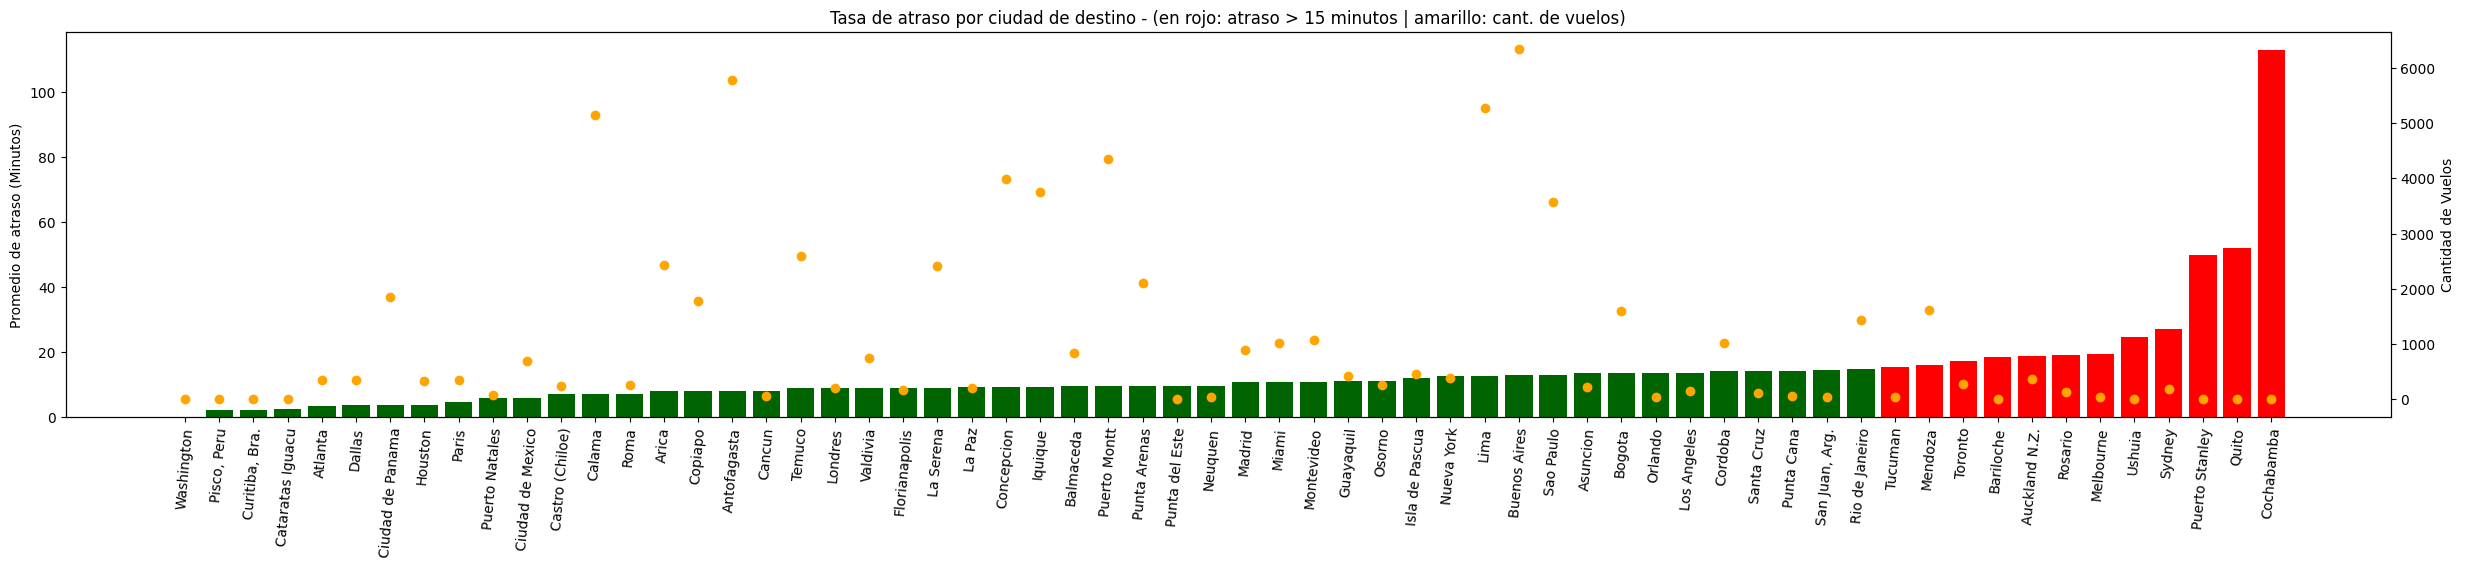

In [25]:
tasa_destino = df_transform.groupby("SIGLADES")["dif_min"].mean().sort_values()
vuelos_por_destino = df_transform.groupby("SIGLADES")["SIGLADES"].count()
vista_destino = pd.merge(tasa_destino, vuelos_por_destino, left_index=True, right_index=True ).sort_values('dif_min', ascending=True)
grafico_tasa(vista_destino, "ciudad de destino")

Se puede observar que los vuelos con atraso por ciudad de destino no son los destinos de mayor cantidad de vuelos

##### Por aerolinea

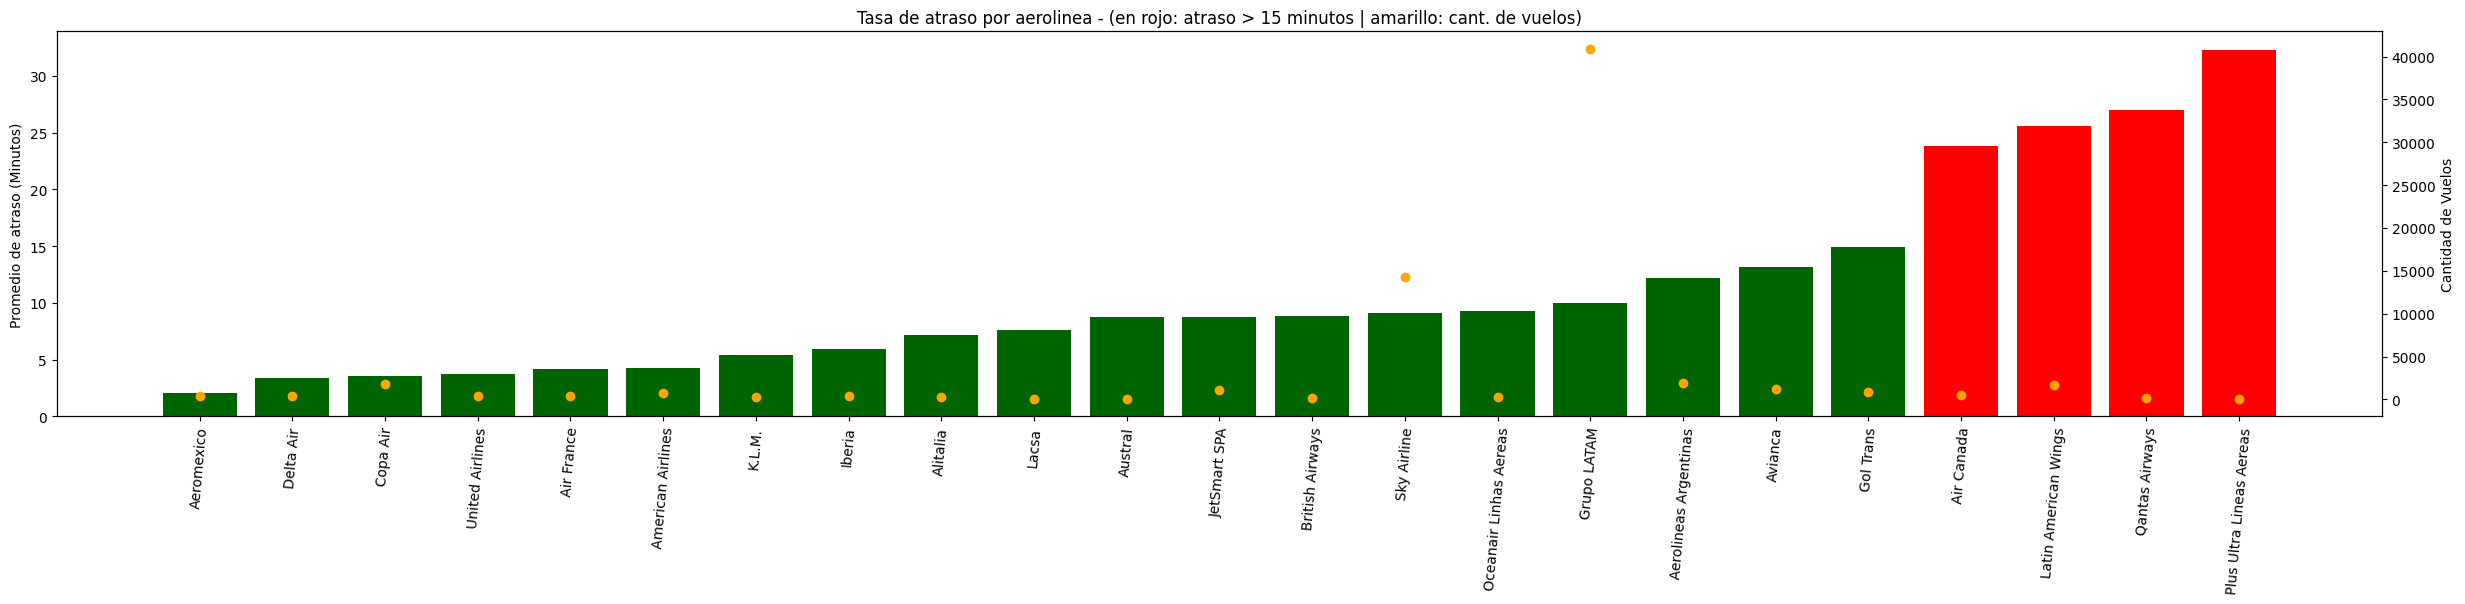

In [26]:
tasa_aerolinea = df_transform.groupby("OPERA")["dif_min"].mean().sort_values()
vuelos_por_aerolinea = df_transform.groupby("OPERA")["OPERA"].count()
vista_aerolinea = pd.merge(tasa_aerolinea, vuelos_por_aerolinea, left_index=True, right_index=True ).sort_values('dif_min', ascending=True)
grafico_tasa(vista_aerolinea, "aerolinea")

Las aerolineas Air Canada, Latin American Wings, Qatar Airways y Plus Ultra Lineas Aereas son las que tienen atraso pero con una cantidad de vuelos que están en el promedio de las demás. Se puede observar que Sky Airline es la aerolinea con mayor cantida de vuelos.

##### Por mes del año

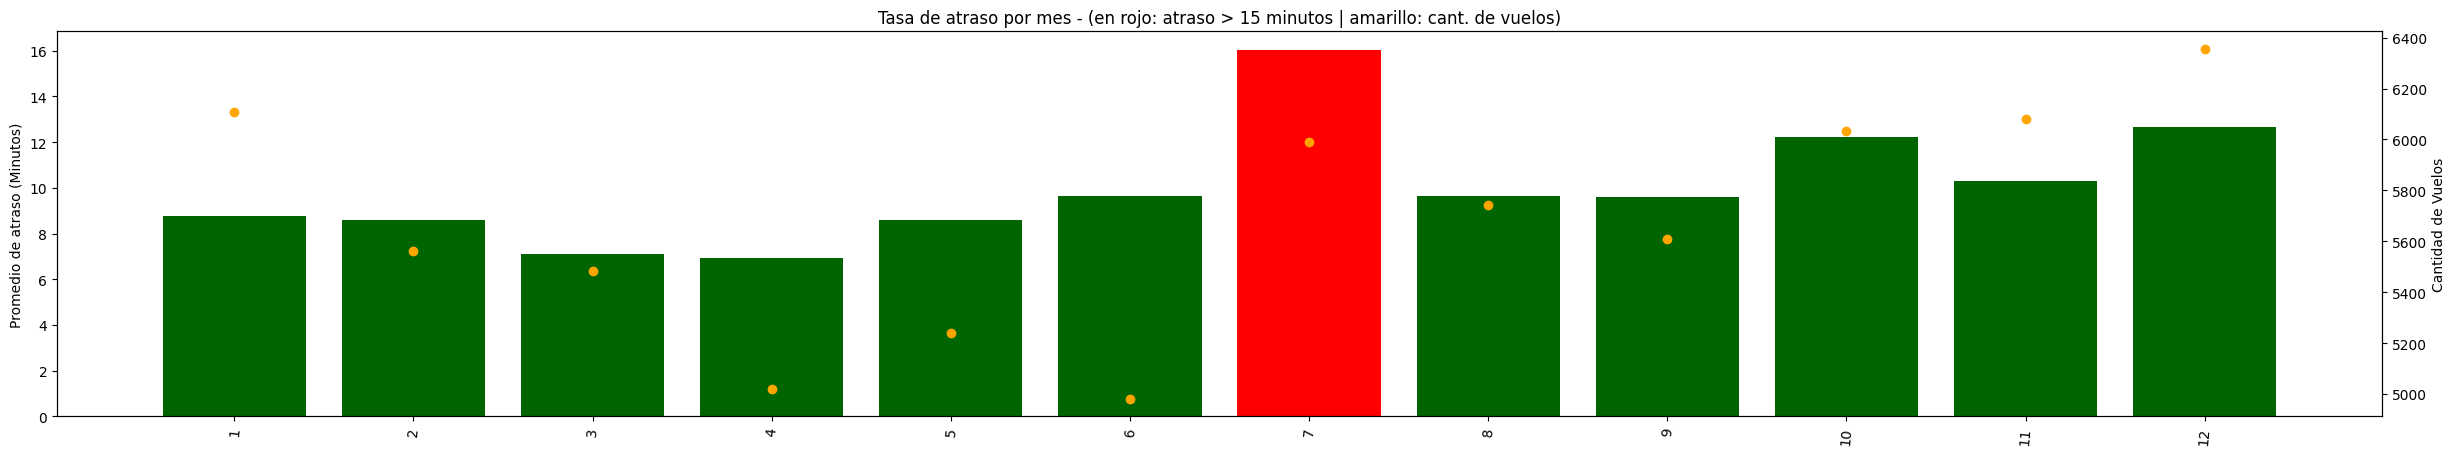

In [27]:
tasa_mes = df_transform.groupby("MES")["dif_min"].mean().sort_values()
vuelos_por_mes = df_transform.groupby("MES")["MES"].count()
vista_mes = pd.merge(tasa_mes, vuelos_por_mes, left_index=True, right_index=True ).sort_values('dif_min', ascending=True)
grafico_tasa(vista_mes, "mes")

Vemos que el mes donde hay mayor atraso en los vuelos es el mes 7 (Julio), con una cantidad significativa de vuelos.

##### Por dia de la semana

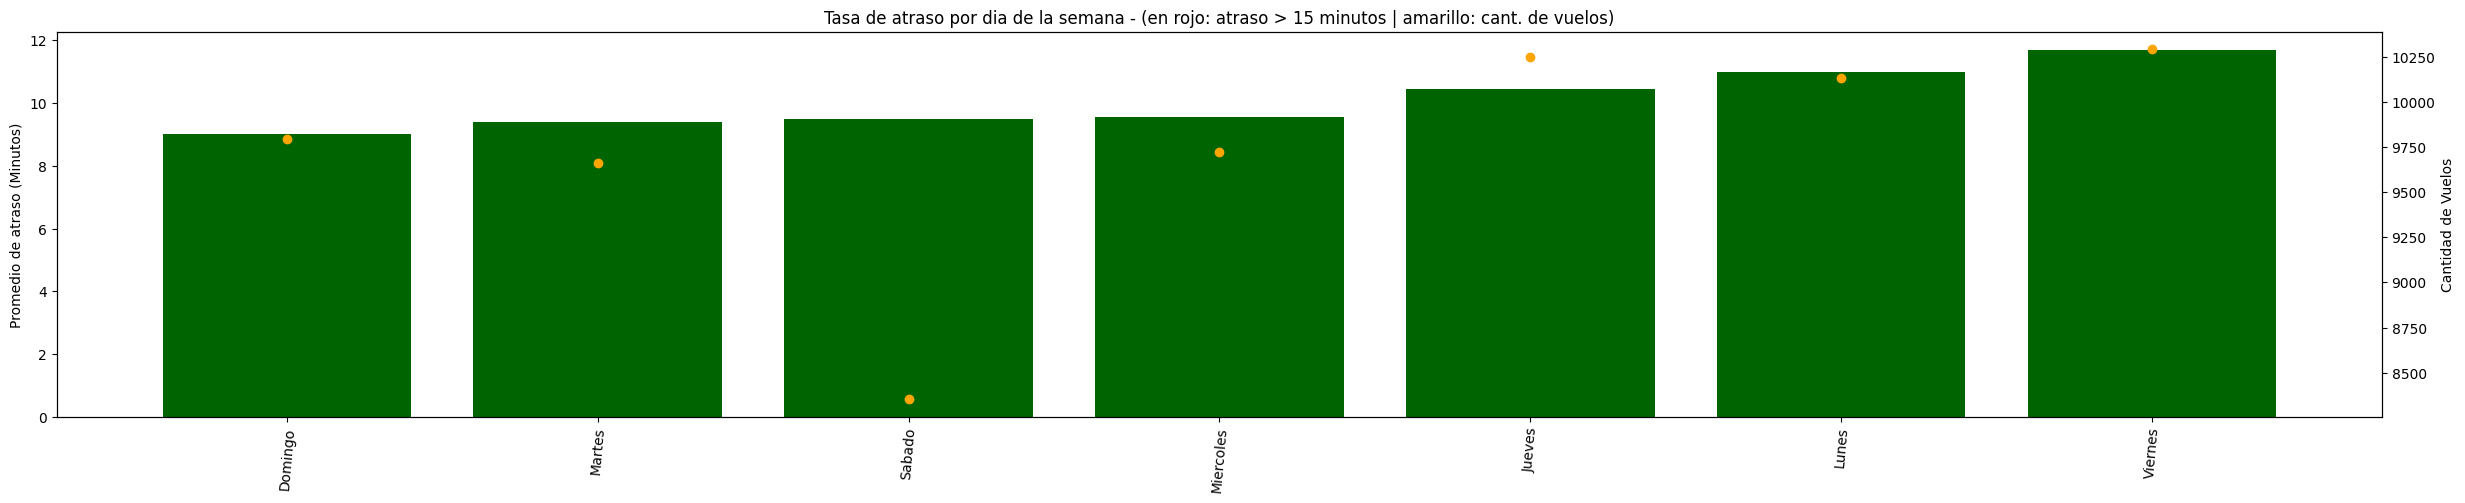

In [28]:
tasa_dia = df_transform.groupby("DIANOM")["dif_min"].mean().sort_values()
vuelos_por_dia = df_transform.groupby("DIANOM")["DIANOM"].count()
vista_dia = pd.merge(tasa_dia, vuelos_por_dia, left_index=True, right_index=True ).sort_values('dif_min', ascending=True)
grafico_tasa(vista_dia, "dia de la semana")

No se observa ningún dia de la semana que en promedio tenga atraso de vuelos

##### Por temporada

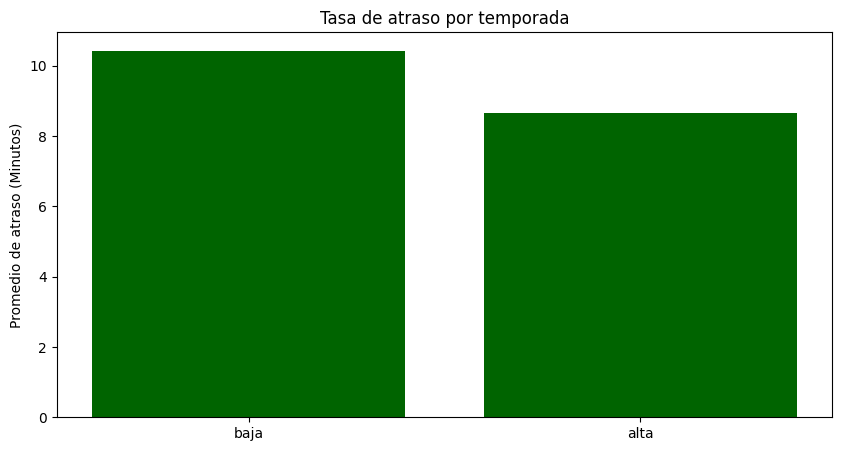

In [29]:
tasa_temporada = df_transform.groupby("temporada_alta")["dif_min"].mean().sort_values()
fig = plt.figure(figsize=(10,5))
plt.bar(tasa_temporada.index, tasa_temporada.values, color='darkgreen')
plt.ylabel("Promedio de atraso (Minutos)")
plt.xticks( [1, 0], ("alta", "baja"))
plt.title("Tasa de atraso por temporada");

No se observa que en temporada alto o baja en promedio tenga atraso de vuelos

##### Por tipo de vuelo

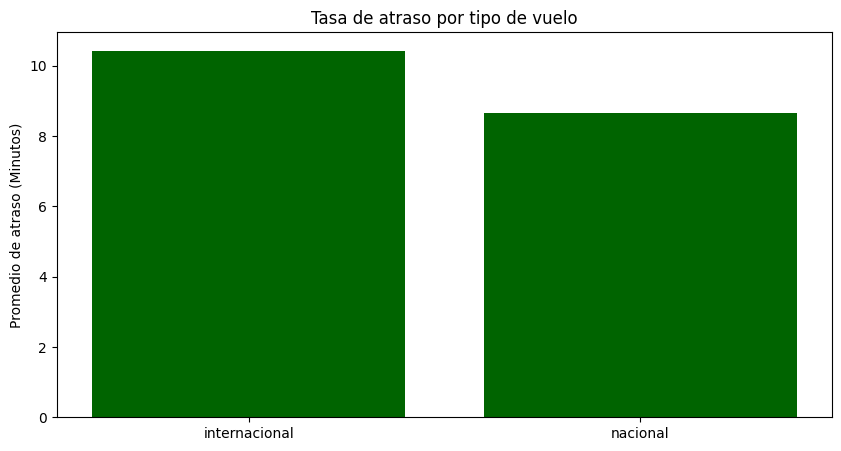

In [30]:
tasa_tipo_vuelo = df_transform.groupby("TIPOVUELO")["dif_min"].mean().sort_values()
fig = plt.figure(figsize=(10,5))
plt.bar(tasa_temporada.index, tasa_temporada.values, color='darkgreen')
plt.ylabel("Promedio de atraso (Minutos)")
plt.xticks( [1, 0], ("nacional", "internacional"))
plt.title("Tasa de atraso por tipo de vuelo");

No se observa que por tipo de vuelo internacional o nacional en promedio tenga atraso de vuelos

### ¿Qué variables pueden influir para predecir atrasos?

Con respecto al promedio de minutos de atraso por variable, las variables mas significativas para predecir atrasos son:


- destino: la variabilidad es de 0 a 113 minutos de retraso
  - hay 12 ciudades de destino de un total de 62 con promedio mayor a 15 minutos de atraso. Ninguno de estos destinos reporta una cantidad de vuelos significativo.
- aerolinea: la variabilidad es de 2 a 32 minutos de retraso
  - hay 4 aerolineas de un total de 23 con promedio mayor a 15 minutos de atraso. Ninguna de estas aerolineas reporta una cantidad de vuelos significativo.
- mes: la variabilidad es de 7 a 16 minutos de retraso
  - el mes de Julio es el que presenta en promedio apenas por encima de los 15 minutos de atraso. Existe una cantidad de vuelos significativos en este mes.

Nota: las variables que mas influyen se han determinado en función de su variabilidad y por exceso de 15 minutos de atraso promedio.

Las demas variables tienen una variabilidad mas uniforme y menor a 15 minutos de atraso

(Nota: Recordemos que le atraso implica la demora entre el horario anunciado de despegue y el horario efectivo de despegue)

## Modelos

- Si se pretende estimar la probabilidad de atraso de un vuelo mayor a 15 minutos se necesita desplegar un modelo de clasificación:
  - [0 no atraso - 1 atraso]
- Por otra parte si se necesita estimar el atraso de un vuelo debemos plantear por ejemplo un modelo regresivo.

El alcance de este proyecto aplica al modelo de clasificación.

#### Pre-procesamiento de los datos

- Variables predictoras: Vlo-I, Des-I Emp-I, Vlo-O, Emp-O, DIA, MES, AÑO, DIANOM, TIPOVUELO, temporada_alta, dif_min, periodo_dia
- Variable objetivo: atraso_15

In [31]:
df_transform['Vlo-I'] = df_transform['Vlo-I'].astype(str) #corregimos el formato de la columna
df_transform['Vlo-O'] = df_transform['Vlo-O'].astype(str) #corregimos el formato de la columna

Validamos los valores únicos de las siguientes variables categóricas:

In [32]:
len(df_transform['Vlo-I'].unique())

584

In [33]:
len(df_transform['Des-I'].unique())

64

In [34]:
len(df_transform['Emp-I'].unique())

30

In [35]:
len(df_transform['Vlo-O'].unique())

861

In [36]:
len(df_transform['Emp-O'].unique())

32

##### Embeddings
Para reducir el dimensionamiento de las variables anteriores se va a utilizar a embeddings

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# Creamos un nuevo dataframe eliminando columnas no utiles
df_embedding = df_transform.drop(['Fecha-I','AÑO', 'Ori-I','Fecha-O', 'Des-O', 'OPERA',	'SIGLAORI',	'SIGLADES'], axis=1).copy()

In [39]:
# Nombres de las variables a transformar con embbedings
var_embbed = ['Vlo-I','Des-I','Emp-I','Vlo-O','Emp-O']

# Nombres de nuevas variables
nuevas_variables = []
for var in var_embbed:
  # Generar el nombre de la nueva variable
  nombre_variable = 'X_encoded_' + str(var[:3]) + '_' + str(var[-1])
  # Agregar el nombre de la nueva variable a la lista
  nuevas_variables.append(nombre_variable)


In [40]:
# Crear una instancia de LE
encoder = LabelEncoder()

In [41]:
# Generacion de embbedings
tamano_embedding = 5
for i in range(len(nuevas_variables)):
  valores_transformados = encoder.fit_transform(df_transform[var_embbed[i]].values.reshape(-1,))  # Codificar los valores alfanuméricos
  matriz = np.random.rand(len(encoder.classes_), tamano_embedding) # Cada matriz tiene un tamaño distinto
  matriz_embedd = matriz[valores_transformados] # matriz de embbedings
  # Vectores de embeddings asociados a un valor por cada atributo
  for c in range(tamano_embedding):
    df_embedding[var_embbed[i]+str(c)] = matriz_embedd[:,c]

# Eliminamos las columnas de las variables transformadas
df_embedding = df_embedding.drop(['Vlo-I','Des-I','Emp-I','Vlo-O','Emp-O'], axis=1)

In [42]:
df_embedding

,DIA,MES,DIANOM,TIPOVUELO,temporada_alta,dif_min,atraso_15,periodo_dia,Vlo-I0,Vlo-I1,Vlo-I2,Vlo-I3,Vlo-I4,Des-I0,Des-I1,Des-I2,Des-I3,Des-I4,Emp-I0,Emp-I1,Emp-I2,Emp-I3,Emp-I4,Vlo-O0,Vlo-O1,Vlo-O2,Vlo-O3,Vlo-O4,Emp-O0,Emp-O1,Emp-O2,Emp-O3,Emp-O4
0,1,1,Domingo,I,1,3.0,0,noche,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075
1,2,1,Lunes,I,1,9.0,0,noche,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075
2,3,1,Martes,I,1,9.0,0,noche,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075
3,4,1,Miercoles,I,1,3.0,0,noche,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075
4,5,1,Jueves,I,1,0.0,0,noche,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,22,12,Viernes,I,0,46.0,1,tarde,0.809672,0.630058,0.015257,0.316357,0.653088,0.338070,0.115979,0.727873,0.842835,0.442679,0.166740,0.972757,0.063281,0.656403,0.219659,0.881801,0.433159,0.906287,0.085484,0.706442,0.387188,0.773192,0.331310,0.161380,0.787954
68202,25,12,Lunes,I,0,16.0,1,tarde,0.809672,0.630058,0.015257,0.316357,0.653088,0.338070,0.115979,0.727873,0.842835,0.442679,0.166740,0.972757,0.063281,0.656403,0.219659,0.881801,0.433159,0.906287,0.085484,0.706442,0.387188,0.773192,0.331310,0.161380,0.787954
68203,27,12,Miercoles,I,0,40.0,1,tarde,0.809672,0.630058,0.015257,0.316357,0.653088,0.338070,0.115979,0.727873,0.842835,0.442679,0.166740,0.972757,0.063281,0.656403,0.219659,0.881801,0.433159,0.906287,0.085484,0.706442,0.387188,0.773192,0.331310,0.161380,0.787954
68204,29,12,Viernes,I,0,13.0,0,tarde,0.809672,0.630058,0.015257,0.316357,0.653088,0.338070,0.115979,0.727873,0.842835,0.442679,0.166740,0.972757,0.063281,0.656403,0.219659,0.881801,0.433159,0.906287,0.085484,0.706442,0.387188,0.773192,0.331310,0.161380,0.787954


##### Transformacion del resto de las variables categoricas a dummies

In [43]:
df_embedding = pd.get_dummies(df_embedding, columns=['DIANOM', 'TIPOVUELO', 'periodo_dia'])

In [44]:
df_embedding

,DIA,MES,temporada_alta,dif_min,atraso_15,Vlo-I0,Vlo-I1,Vlo-I2,Vlo-I3,Vlo-I4,Des-I0,Des-I1,Des-I2,Des-I3,Des-I4,Emp-I0,Emp-I1,Emp-I2,Emp-I3,Emp-I4,Vlo-O0,Vlo-O1,Vlo-O2,Vlo-O3,Vlo-O4,Emp-O0,Emp-O1,Emp-O2,Emp-O3,Emp-O4,DIANOM_Domingo,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_I,TIPOVUELO_N,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde
0,1,1,1,3.0,0,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075,1,0,0,0,0,0,0,1,0,0,1,0
1,2,1,1,9.0,0,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075,0,0,1,0,0,0,0,1,0,0,1,0
2,3,1,1,9.0,0,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075,0,0,0,1,0,0,0,1,0,0,1,0
3,4,1,1,3.0,0,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075,0,0,0,0,1,0,0,1,0,0,1,0
4,5,1,1,0.0,0,0.079678,0.181429,0.807592,0.688060,0.474297,0.845447,0.661440,0.056356,0.712907,0.352980,0.468796,0.339515,0.148139,0.230611,0.384003,0.790408,0.472478,0.310375,0.288809,0.416611,0.445401,0.191290,0.586709,0.458544,0.118075,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,22,12,0,46.0,1,0.809672,0.630058,0.015257,0.316357,0.653088,0.338070,0.115979,0.727873,0.842835,0.442679,0.166740,0.972757,0.063281,0.656403,0.219659,0.881801,0.433159,0.906287,0.085484,0.706442,0.387188,0.773192,0.331310,0.161380,0.787954,0,0,0,0,0,0,1,1,0,0,0,1
68202,25,12,0,16.0,1,0.809672,0.630058,0.015257,0.316357,0.653088,0.338070,0.115979,0.727873,0.842835,0.442679,0.166740,0.972757,0.063281,0.656403,0.219659,0.881801,0.433159,0.906287,0.085484,0.706442,0.387188,0.773192,0.331310,0.161380,0.787954,0,0,1,0,0,0,0,1,0,0,0,1
68203,27,12,0,40.0,1,0.809672,0.630058,0.015257,0.316357,0.653088,0.338070,0.115979,0.727873,0.842835,0.442679,0.166740,0.972757,0.063281,0.656403,0.219659,0.881801,0.433159,0.906287,0.085484,0.706442,0.387188,0.773192,0.331310,0.161380,0.787954,0,0,0,0,1,0,0,1,0,0,0,1
68204,29,12,0,13.0,0,0.809672,0.630058,0.015257,0.316357,0.653088,0.338070,0.115979,0.727873,0.842835,0.442679,0.166740,0.972757,0.063281,0.656403,0.219659,0.881801,0.433159,0.906287,0.085484,0.706442,0.387188,0.773192,0.331310,0.161380,0.787954,0,0,0,0,0,0,1,1,0,0,0,1


#### Analisis de balance de clases

In [45]:
clases = df_embedding['atraso_15'].value_counts()
clases

0    55592
1    12614
Name: atraso_15, dtype: int64

- Las clases estan desbalanceadas
- Esto puede llevar a un sesgo en el rendimiento del modelo, ya que puede tener dificultades para aprender patrones de la clase minoritaria debido a la dominancia de la clase mayoritaria.
- Sin embargo se realizará un primer modelo con las clases desbalanceadas y luego otro con balance de clases



#### Modelo de clasificacion: XGBoost

In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
pd.options.display.float_format = '{:.4f}'.format

In [47]:
X = df_embedding.drop(['atraso_15'], axis=1)

In [48]:
y = df_transform.loc[:, df_transform.columns == "atraso_15" ]

In [49]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Crear el modelo
model_xgb = XGBClassifier(booster='dart', learning_rate=0.1, random_state=40)

In [51]:
# Entrenar el modelo
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=40, ...)

In [52]:
# Estimaciones
predictions_xgb = model_xgb.predict(X_test)

##### Evaluacion

In [53]:
accuracy = accuracy_score(y_test, predictions_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [55]:
# Funcion evaluadora
def matrizConfusion(modelo, nombre, y_train, y_test, y_pred_train, y_pred_test, observacion):

    accuracy_train = round(accuracy_score(y_train, y_pred_train, normalize = True),4)
    accuracy_test  = round(accuracy_score(y_test, y_pred_test, normalize = True),4)

    precision = round(precision_score(y_test, y_pred_test),4)
    recall = round(recall_score(y_test, y_pred_test),4)
    f1 = round(f1_score(y_test, y_pred_test),4)
    auc = round(roc_auc_score(y_test, modelo.predict_proba(X_test)[:,1]),4)

    text_to_print = ''
    confusion_matrix = pd.crosstab(y_test.iloc[:,0].ravel(), y_pred_test, rownames=['Real'], colnames=['Predicción'])
    group_names = ['Verd Neg','Falso Pos','Falso Neg','Verd Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in  confusion_matrix.values.reshape(-1)]
    group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.values.reshape(-1)/np.sum(confusion_matrix.values)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    fig, axs = plt.subplots(1,2, figsize=(8,4), gridspec_kw = {'width_ratios':[1, 1]})
    txt  = axs[0]
    ax = axs[1]
    fig.suptitle(type(modelo).__name__+"-"+nombre, fontsize=14, fontweight='bold')
    txt.set_title("Datos de Evaluación")
    ax.set_title("Matriz de confusion")
    txt.axis("off")
    text_to_print = text_to_print + 'Train Accuracy = ' + str(accuracy_train) + '\n'
    text_to_print = text_to_print + 'Test  Accuracy = ' + str(accuracy_test) + '\n\n'
    text_to_print = text_to_print + 'Precision      = ' + str(precision) + '\n'
    text_to_print = text_to_print + 'Recall         = ' + str(recall) + '\n'
    text_to_print = text_to_print + 'F1 Score       = ' + str(f1) + '\n\n'
    text_to_print = text_to_print + 'AUC            = ' + str(auc) + '\n\n'
    text_to_print = text_to_print + 'Cant. Total datos Test = ' + str(np.sum(confusion_matrix.values))
    txt.text(0, 0.95, text_to_print, fontsize=14, verticalalignment='top');
    ax = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=labels, fmt='', cmap='Blues', cbar=None, annot_kws={"size":14})
    return [type(modelo).__name__, nombre, auc, precision, recall, f1, accuracy_train, accuracy_test, observacion]

In [56]:
# Contenedor de resultados
columns = ["Modelo", "Nombre", "AUC", "Precision", "Recall", "F1", "Accuracy Train", "Accuracy Test", "Balanceo"]
df_result = pd.DataFrame(columns=columns)

In [57]:
y_pred_train_xgb = model_xgb.predict(X_train)
y_pred_test_xgb = model_xgb.predict(X_test)

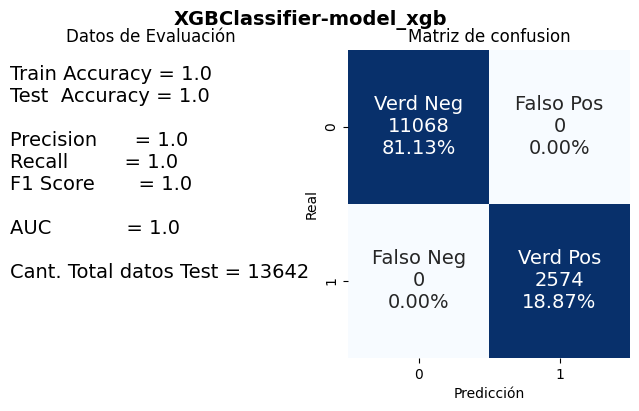

In [58]:
df_result = pd.concat([df_result, pd.DataFrame([matrizConfusion(model_xgb, "model_xgb", y_train, y_test, y_pred_train_xgb, y_pred_test_xgb, 'no')], columns=columns)])

##### Conclusiones

- 1. El modelo presenta un buen rendimiento a priori pero XGBoost es superior, podríamos estar en presencia de overfitting aún habiendo aplicado una compensación en los hiperparámetros para balancear las clases en el modelo, sin embargo otra alternativa para someter a evaluación es proporcionar con datos sinteticos un balance de clases (oversampling / undersampling) y evaluar el modelo.

- 2. No se ha trabajado en la búsqueda de hiperparámetros, se utilizaron los hiperparametros por default.

- 3. Se procede a modelar con un regresor logístico para evaluar rendimiento ajustando por hiperparámetro el desbalance de clases.


### Modelo de clasificación: REGRESION LOGISTICA

Se utilizará un modelo de regresion logística para compara rendimientos, utilizando el hiperparámetro class_weight = 'balanced', para que ayudar a mitigar el problema del desbalance de clases.

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
# Crea el modelo
model_lr = LogisticRegression(class_weight = 'balanced', random_state=42)

In [61]:
# Entrenar el modelo
model_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [62]:
# Estimaciones
predictions_lr = model_lr.predict(X_test)

##### Evaluacion

In [63]:
accuracy = accuracy_score(y_test, predictions_lr)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.89%


In [64]:
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)

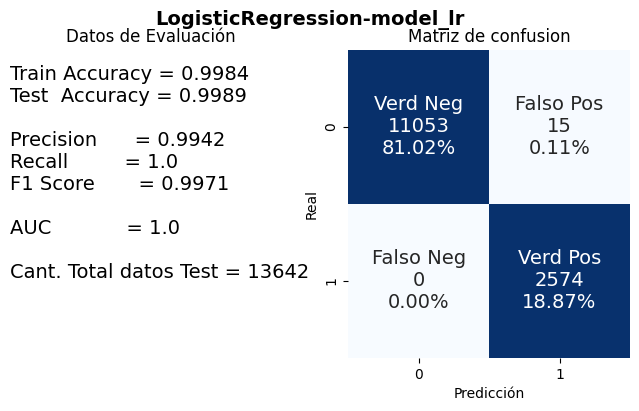

In [65]:
df_result = pd.concat([df_result, pd.DataFrame([matrizConfusion(model_lr, "model_lr", y_train, y_test, y_pred_train_lr, y_pred_test_lr, 'no')], columns=columns)])

In [66]:
df_result

,Modelo,Nombre,AUC,Precision,Recall,F1,Accuracy Train,Accuracy Test,Balanceo
0,XGBClassifier,model_xgb,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,no
0,LogisticRegression,model_lr,1.0000,0.9942,1.0000,0.9971,0.9984,0.9989,no


##### Conclusiones

- 1. El modelo presenta un buen rendimiento a priori pero XGBoost es superior, podríamos estar en presencia de overfitting para lo que se realizara una transformación de los datos para balancear las clases y luego evaluar el nuevo modelo.

- 2. No se ha trabajado en la búsqueda de hiperparámetros, se utilizaron los hiperparametros por default.

- 3. No se incluye el modelo de regresión para estimar cantidad de minutos de atraso por despegue, pero es válido tenerlo en cuenta para complementarlo.

### Balanceo de clases

Existen dos técnicas conocidas para tratar con el desbalance de clases: el downsampling y el oversampling. Recordemos la proporcion del desbalance:

In [70]:
print(f"Clase 0 = {clases[0]} {round(clases[0]/sum(clases)*100)}%")
print(f"Clase 1 = {clases[1]} {round(clases[1]/sum(clases)*100)}%")
print(f"Total {sum(clases)}")


Clase 0 = 55592 82%
Clase 1 = 12614 18%
Total 68206


- downsampling: consiste en hacer una muestra aleatoria con la misma cantidad de registros que la clase 1 (con atraso) de esta manera se balancean ambas clases.
  - En un desbalance 82-18, aplicar downsampling implica trabajar con el 36% de los datos originales, todos datos puros.

- oversampling: consiste en crear registros ficticios de la clase 1 (con atraso) siguiendo características similares a los que están en el dataset, con el objetivo de incrementar la clase 1 y balancear el dataset
  - En un desbalance 82-18, aplicar oversampling implica que la generación de datos sintéticos representa un 38% del total.


Se decide optar por oversampling utilizando tecnicas SMOTE, ya que de aplicar downsampling la cantidad de muestras se vería muy reducida, perdiendo probablemente información importante de la clase mayoritaria.

In [71]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [73]:
oversample = SMOTE()

In [74]:
X_smote, y_smote = oversample.fit_resample(X, y)

#### Modelo de clasificación: XGBoost (balance de clases)

In [80]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [81]:
# Crear el modelo
model_xgb_b = XGBClassifier(booster='dart', learning_rate=0.1, random_state=40)

# Entrenar el modelo
model_xgb_b.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=40, ...)

In [82]:
y_pred_train_xgb_b = model_xgb_b.predict(X_train)
y_pred_test_xgb_b = model_xgb_b.predict(X_test)

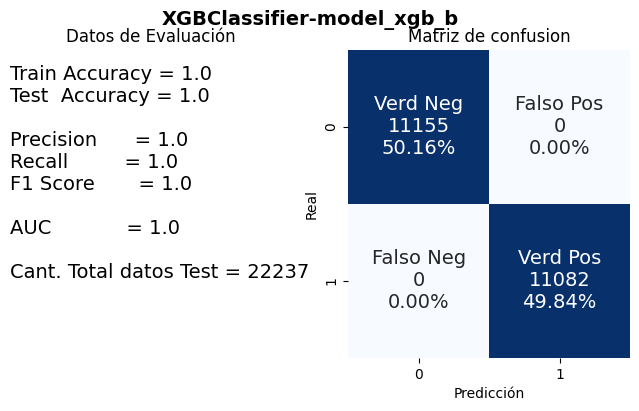

In [83]:
df_result = pd.concat([df_result, pd.DataFrame([matrizConfusion(model_xgb_b, "model_xgb_b", y_train, y_test, y_pred_train_xgb_b, y_pred_test_xgb_b, 'si')], columns=columns)])

In [84]:
df_result

,Modelo,Nombre,AUC,Precision,Recall,F1,Accuracy Train,Accuracy Test,Balanceo
0,XGBClassifier,model_xgb,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,no
0,LogisticRegression,model_lr,1.0000,0.9942,1.0000,0.9971,0.9984,0.9989,no
0,XGBClassifier,model_xgb_b,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,si


##### Conclusiones
Hemos verificado que utilizando oversampling el modelo se comporta de la misma forma que sin balanceo para XGBoost.

## Consideraciones finales

- Es importante aclarar que no se cuenta con información adicional que ayude a establecer las causas de los atrasos, como por ejemplo el estado del tiempo de los vuelos, o problemas de índole sindical que afecte el normal funcionamiento de los servicios, etc.